# Libraries

In [18]:
import pandas as pd
import glob
# import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
from datetime import date, timedelta
warnings.filterwarnings('ignore') #igonora qualquer aviso!
import numpy as np
import math
# from sklearn import metrics
# from sklearn.metrics import ConfusionMatrixDisplay


# Input parameters

In [2]:
# Caminhos dos diretórios raiz
# general_path = 'C:/Users/cnalm/OneDrive/Hidroweb'    # Caminho do projeto (Cristiano)
# general_path = 'D:/Dados_Nuvem/OneDrive/Hidroweb'   # Colocar aqui o caminho de Filipe
general_path = 'C:/Users/linde/OneDrive/Hidroweb'   # Colocar aqui o caminho de Lindemberg
states = ['AC','AP','TO','AM','RR','RO','PA','PE','BA','PI','CE','MA','AL','PB','RN','SE','MT','MS',
          'GO','DF','SP','MG','RJ','ES','RS','SC','PR']


# <span style="color:whit">**Functions**</span>

In [ ]:
# Definindo o valor que queremos contar consecutivo
valor = 0.2

# Função para contar as ocorrências consecutivas de um valor em uma coluna do DataFrame
def contar_ocorrencias_consecutivas(df, coluna, valor = 0.2):
    """
    Descrição:
    A função contar_ocorrencias_consecutivas percorre um DataFrame,
    contando o número máximo de ocorrências consecutivas de um valor específico em uma coluna.
    O objetivo principal é identificar a maior sequência de valores consecutivos iguais ao valor fornecido.

    Parâmetros:
    df (pd.DataFrame):
    O DataFrame que contém os dados a serem analisados.
    coluna (str):
    O nome da coluna no DataFrame onde a busca será realizada.
    valor (float, opcional):
    O valor a ser buscado na coluna. Por padrão, o valor é 0.2.
    Retorno:
    max_contador (int):
    O número máximo de ocorrências consecutivas do valor especificado na coluna do DataFrame.
    """ 
    df.reset_index(inplace=True)
    contador = 0
    max_contador = 0
    for i in range(len(df)):
        if df[coluna][i] == valor:
            contador += 1
            if contador > max_contador:
                max_contador = contador
        else:
            contador = 0
    return max_contador


# Função para contar as ocorrências consecutivas de um valor em uma coluna do DataFrame
def contar_ocorrencias_consecutivas3(df, coluna, valor = 0.2):
    """
        Conta o número máximo de ocorrências consecutivas onde os valores de uma coluna 
        são menores ou iguais a um valor específico, após filtrar o DataFrame por um critério.

        Parameters
        ----------
        df : pandas.DataFrame
            O DataFrame que contém os dados a serem analisados.
        coluna : str
            O nome da coluna no DataFrame onde a busca será realizada.
        valor : float, optional
            O valor usado como critério para filtrar e contar as ocorrências. O padrão é 0.2.

        Returns
        -------
        int
            O número máximo de ocorrências consecutivas onde os valores na coluna especificada 
            são menores ou iguais ao valor fornecido.

        Examples
        --------
        >>> import pandas as pd
        >>> data = {'rain_mm': [0.3, 0.2, 0.1, 0.4, 0.2, 0.2, 0.1], 
        ...         'coluna_exemplo': [0.2, 0.2, 0.1, 0.3, 0.1, 0.2, 0.2]}
        >>> df = pd.DataFrame(data)
        >>> contar_ocorrencias_consecutivas3(df, 'coluna_exemplo')
        2
        """
    df = df[df['rain_mm']>=valor] #df_temp
    df.reset_index(drop=True,inplace=True)
    contador = 0
    max_contador = 0
    for i in range(len(df)):
        if df[coluna][i] <= valor:
            contador += 1
            if contador > max_contador:
                max_contador = contador
        else:
            contador = 0
    return max_contador


def contar_ocorrencias_consecutivas_2(df):
    """
    Conta o número máximo de ocorrências consecutivas de um valor específico em uma coluna do DataFrame, 
    com base no intervalo de tempo entre registros.

    Parameters
    ----------
    df : pandas.DataFrame
    O DataFrame que contém os dados a serem analisados. Deve conter as colunas 'rain_mm' e 'datetime'.

    valor : float
    O valor a ser comparado na coluna 'rain_mm' para filtrar o DataFrame.

    Returns
    -------
    int
    O número máximo de ocorrências consecutivas de registros onde o intervalo de tempo entre eles 
    está dentro de um intervalo específico (entre 30 e 160 minutos).

    Examples
    --------
    >>> import pandas as pd
    >>> from datetime import datetime, timedelta
    >>> data = {'rain_mm': [0.2, 0.2, 0.2, 0.2],
    ...         'datetime': [datetime(2023, 8, 10, 10, 0),
    ...                      datetime(2023, 8, 10, 10, 45),
    ...                      datetime(2023, 8, 10, 11, 30),
    ...                      datetime(2023, 8, 10, 12, 20)]}
    >>> df = pd.DataFrame(data)
    >>> contar_ocorrencias_consecutivas_2(df)
    3
    """
    df = df[df['rain_mm']==valor] #df_temp
    df.reset_index(drop=True,inplace=True)
    
    df['delta_time'] = timedelta(minutes=0)
    for i in range(len(df)):
       if i != 0:
        df.loc[i, 'delta_time'] = (df['datetime'][i] - df['datetime'][i-1]) 

    contador = 0
    max_contador = 0
    for i in range(len(df)):
        if (df['delta_time'][i] >= timedelta(minutes=30)) and (df['delta_time'][i] <= timedelta(minutes=160)):
            contador += 1
            if contador > max_contador:
                max_contador = contador
        else:
            contador = 0
    return max_contador

# DATA GATHERING

In [4]:
df_data = pd.read_hdf(general_path + '/Consolidated Files/TELEMETRIA/TELEMETRIA_DATA.h5', 'table_data')
df_data['datetime'] = pd.to_datetime(df_data['datetime'])
df_data['year'] = df_data['datetime'].dt.year
df_data

gauge_code            datetime  rain_mm  year
0           12370000 2021-01-01 00:00:00      0.0  2021
1           12370000 2021-01-01 00:15:00      0.0  2021
2           12370000 2021-01-01 00:30:00      0.0  2021
3           12370000 2021-01-01 00:45:00      0.0  2021
4           12370000 2021-01-01 01:00:00      0.4  2021
...              ...                 ...      ...   ...
110127266   28850000 2023-12-31 22:45:00      0.0  2023
110127267   28850000 2023-12-31 23:00:00      0.0  2023
110127268   28850000 2023-12-31 23:15:00      0.0  2023
110127269   28850000 2023-12-31 23:30:00      0.0  2023
110127270   28850000 2023-12-31 23:45:00      0.0  2023

[110127271 rows x 4 columns]

In [5]:
df_info = pd.read_hdf(general_path + '/Consolidated Files/TELEMETRIA/TELEMETRIA_INFO.h5', 'table_info')
df_info.drop_duplicates(inplace=True, ignore_index=True)
df_info

gauge_code                  city state                   name_station  \
0      12370000  MARECHAL THAUMATURGO    AC                    THAUMATURGO   
1      12500000       CRUZEIRO DO SUL    AC                CRUZEIRO DO SUL   
2      12510500              TARAUACÁ    AC         PONTE DO RIO LIBERDADE   
3      12557000                JORDÃO    AC                         JORDÃO   
4      12590000              TARAUACÁ    AC              PONTE DE TARAUACÁ   
...         ...                   ...   ...                            ...   
2313   23100100            TUPIRATINS    TO        UHE ESTREITO MONTANTE 2   
2314   23495000        TOCANTINÓPOLIS    TO           UHE ESTREITO JUSANTE   
2315   26795140                  PIUM    TO         JUSANTE PONTE RIO PIUM   
2316   26795200     LAGOA DA CONFUSÃO    TO  MONTANTE EIXO PONTE RIO URUBU   
2317   26795800   FORMOSO DO ARAGUAIA    TO              PONTE RIO XAVANTE   

          lat     long Status  SubBasin          Origem  \
0     -8.9458 -72.7847  Ativo        12             RHN   
1     -7.6333 -72.6603  Ativo        12             RHN   
2     -7.7994 -72.0211  Ativo        12             RHN   
3     -9.1883 -71.9525  Ativo        12             RHN   
4     -8.1519 -70.7456  Ativo        12             RHN   
...       ...      ...    ...       ...             ...   
2313  -8.3917 -48.1114  Ativo        23  Setor Elétrico   
2314  -6.2889 -47.3917  Ativo        23  Setor Elétrico   
2315 -10.3903 -49.8167  Ativo        26             RHN   
2316 -10.8581 -49.6031  Ativo        26             RHN   
2317 -11.6894 -49.1572  Ativo        26             RHN   

                                            Responsible  Elevation  n_years  
0              00001 - ANA - Agência Nacional de Águas         0.0      9.0  
1              00001 - ANA - Agência Nacional de Águas         0.0      7.0  
2              00001 - ANA - Agência Nacional de Águas       189.0     10.0  
3     00380 - SEMA-AC - Secretaria de Meio Ambiente ...      239.0      5.0  
4              00001 - ANA - Agência Nacional de Águas         0.0     10.0  
...                                                 ...        ...      ...  
2313  00791 - CONS.CESTE - Consórcio Estreito Energi...      170.0      1.0  
2314  00791 - CONS.CESTE - Consórcio Estreito Energi...      132.0      1.0  
2315  00258 - SEMARH-TO - Secretaria do Meio Ambient...        0.0      1.0  
2316  00258 - SEMARH-TO - Secretaria do Meio Ambient...      211.0      1.0  
2317  00258 - SEMARH-TO - Secretaria do Meio Ambient...        0.0      1.0  

[2318 rows x 12 columns]

In [6]:
station_list = df_data['gauge_code'].drop_duplicates().values.tolist()
station_list

['12370000',
 '12500000',
 '12510500',
 '12557000',
 '12590000',
 '12640000',
 '12650000',
 '13180000',
 '13310000',
 '13450000',
 '13470000',
 '13540000',
 '13550000',
 '13568000',
 '13572000',
 '13600002',
 '13610001',
 '15324000',
 '39580000',
 '39622000',
 '39700000',
 '39720000',
 '39740000',
 '39760000',
 '39770000',
 '39852010',
 '39855000',
 '39860000',
 '39863000',
 '39866000',
 '39870000',
 '39950000',
 '49208080',
 '49340200',
 '10100000',
 '10200000',
 '10500000',
 '10910000',
 '11400000',
 '11500000',
 '12100000',
 '12240000',
 '12351000',
 '12520000',
 '12540000',
 '12680000',
 '12700000',
 '12840000',
 '12842000',
 '12845000',
 '12850000',
 '12880000',
 '12900001',
 '13100000',
 '13150003',
 '13410000',
 '13710001',
 '13870000',
 '13962000',
 '14100000',
 '14110000',
 '14280001',
 '14330000',
 '14480002',
 '14840000',
 '14990000',
 '15030000',
 '15629000',
 '15630000',
 '15700000',
 '15860000',
 '15910000',
 '16018000',
 '16019000',
 '16020100',
 '16020200',
 '16024900',

# OCORRÊNCIAS CONSECUTIVAS

In [9]:
for station in station_list[:]:
    df_temp_station = df_data[df_data['gauge_code'] == station]
    print(station)
    year_list = df_temp_station['year'].drop_duplicates().values.tolist()
    for year in year_list:
        print(year)
        df_temp_station_year = df_temp_station[df_temp_station['year'] == year]
        start_date = date(year, 1, 1)
        end_date = date(year, 12, 31)
        dias = abs((end_date-start_date).days)+1
        lista_dias = list(range(1, dias+1, 1))
        main_columns = ['gauge_code', 'lat', 'long','state','city', 'quality', 'PDmax_year', 'day_02mm', 'day_02mm_in_time', 'day_02mm_in_time_sec', 'No_data']
        main_columns.extend(lista_dias)
        df_save = pd.DataFrame(columns=main_columns)
        lin_ref = 0
        MaxDay_Year = df_temp_station_year['rain_mm'].max()
        ocorrencias_consecutivas = contar_ocorrencias_consecutivas(df_temp_station_year, 'rain_mm')
        ocorrencias_consecutivas2 = contar_ocorrencias_consecutivas_2(df_temp_station_year)
        ocorrencias_consecutivas3 = contar_ocorrencias_consecutivas3(df_temp_station_year, 'rain_mm')
        df_temp_station_year.set_index('datetime', inplace = True)
        df_day = df_temp_station_year.resample('D').sum()
        df_day['rain_mm'] = df_day['rain_mm'].cumsum()

        """
        Este código abaixo acumula a precipitação ao longo de um ano,
        e preenchendo um novo DataFrame (df_save) com esses valores.
        Se não houver dados disponíveis para um dia específico,
        ele preenche as lacunas com o valor da precipitação acumulada do dia anterior.
        A função também rastreia quantos dias não têm dados (NoData).
        """
        start_date = date(year, 1, 1)
        end_date = date(year, 12, 31)
        delta = timedelta(days=1)
        lin = 0
        col_ref = 1
        cont_NoData = 0
        while start_date <= end_date:
            if start_date.strftime("%Y-%m-%d") in df_day.index:
                df_save.loc[lin_ref, col_ref]=df_day.loc[start_date.strftime("%Y-%m-%d"),'rain_mm']
                col_ref+=1
            else:
                if (lin == 0) and (col_ref == 1):
                    df_save.loc[lin_ref, col_ref] = 0.0
                    col_ref+=1
                else:
                    df_save.loc[lin_ref, col_ref]=df_save.loc[lin_ref,col_ref-1]
                    col_ref+=1
                cont_NoData +=1
            start_date += delta
        df_save.loc[lin_ref, 'quality'] = "-"

        # df_info
        df_temp2 = df_info[df_info['gauge_code'] == station]
        df_temp2 = df_temp2.reset_index(drop=True)       
        df_save.loc[lin_ref,'lat'] = df_temp2.loc[0,'lat']
        df_save.loc[lin_ref,'state'] = df_temp2.loc[0,'state']
        df_save.loc[lin_ref,'long'] = df_temp2.loc[0,'long']
        df_save.loc[lin_ref, 'gauge_code'] = df_temp2.loc[0,'gauge_code']
        df_save.loc[lin_ref,'city'] = df_temp2.loc[0,'city']
        df_save.loc[lin_ref,'PDmax_year'] = MaxDay_Year
        df_save.loc[lin_ref,'day_02mm'] = ocorrencias_consecutivas
        df_save.loc[lin_ref,'day_02mm_in_time'] = ocorrencias_consecutivas2
        df_save.loc[lin_ref,'day_02mm_in_time_sec'] = ocorrencias_consecutivas3
        df_save.loc[lin_ref,'No_data'] = cont_NoData
        lin_ref+=1
        print(df_save)
        df_save.to_hdf(general_path + '/Consolidated Files/TELEMETRIA/QUALIDADE/TELEMETRIA_'+station+'_'+str(year)+'.h5' , key='data', complevel=9
                          , complib='zlib') 


12370000
2021
  gauge_code     lat     long state                  city quality PDmax_year  \
0   12370000 -8.9458 -72.7847    AC  MARECHAL THAUMATURGO       -       26.2   

  day_02mm day_02mm_in_time day_02mm_in_time_sec  ...     356     357     358  \
0        4                5                    9  ...  1585.6  1585.6  1585.6   

      359     360     361     362     363     364     365  
0  1585.6  1585.6  1585.6  1585.6  1585.6  1585.6  1585.6  

[1 rows x 376 columns]
2023
  gauge_code     lat     long state                  city quality PDmax_year  \
0   12370000 -8.9458 -72.7847    AC  MARECHAL THAUMATURGO       -       62.4   

  day_02mm day_02mm_in_time day_02mm_in_time_sec  ...     356     357     358  \
0        6                8                   11  ...  1560.6  1573.8  1580.8   

      359     360     361     362     363     364     365  
0  1581.0  1609.8  1637.2  1637.4  1637.4  1637.4  1673.6  

[1 rows x 376 columns]
12500000
2021
  gauge_code     lat     long s

In [14]:
all_files = glob.glob(general_path + '/Consolidated Files/TELEMETRIA/QUALIDADE' + "\*.h5")
print(len(all_files))
print(all_files[0:2])

5739
['C:/Users/linde/OneDrive/Hidroweb/Consolidated Files/TELEMETRIA/QUALIDADE\\TELEMETRIA_02042051_2021.h5', 'C:/Users/linde/OneDrive/Hidroweb/Consolidated Files/TELEMETRIA/QUALIDADE\\TELEMETRIA_02042051_2022.h5']


In [21]:
filename = r"C:/Users/linde/OneDrive/Hidroweb/Consolidated Files/TELEMETRIA/QUALIDADE/TELEMETRIA_02042051_2021.h5"
df = pd.read_hdf(filename)
df['year'] = int(filename[-7:][:4])
df

gauge_code       lat      long state                city quality PDmax_year  \
0   02042051 -20.97888 -42.50944    MG  ROSÁRIO DA LIMEIRA       -       37.6   

  day_02mm day_02mm_in_time day_02mm_in_time_sec  ...    357    358    359  \
0        4                5                   11  ...  200.0  200.0  203.8   

     360    361    362    363    364    365  year  
0  205.6  206.0  216.0  220.8  226.8  228.4  2021  

[1 rows x 377 columns]

In [22]:
total_length = len(all_files)
count = 0
for filename in all_files:
    df = pd.read_hdf(filename)
    df['year'] = int(filename[-7:][:4])
    df.dropna(inplace=True)
    df.reset_index(inplace=True, drop=True)
    if count == 0:
        df_total_info = df.copy(deep = True)
    else:
        df_total_info = pd.concat([df_total_info, df], ignore_index = True)
    count = count + 1
    print("Loading...", count, "/" , total_length,"|", filename, "|",len(df),"rows")
    del(df)
print(count, "files.")
df_total_info.to_hdf(general_path + '/Consolidated Files/TELEMETRIA/TELEMETRIA_PARAMETROS_REPET.h5', 'table_info', mode = 'w', append = False, complevel = 9, encoding="cp860")
df_total_info

Loading... 1 / 5739 | C:/Users/linde/OneDrive/Hidroweb/Consolidated Files/TELEMETRIA/QUALIDADE\TELEMETRIA_02042051_2021.h5 | 1 rows
Loading... 2 / 5739 | C:/Users/linde/OneDrive/Hidroweb/Consolidated Files/TELEMETRIA/QUALIDADE\TELEMETRIA_02042051_2022.h5 | 1 rows
Loading... 3 / 5739 | C:/Users/linde/OneDrive/Hidroweb/Consolidated Files/TELEMETRIA/QUALIDADE\TELEMETRIA_02042051_2023.h5 | 1 rows
Loading... 4 / 5739 | C:/Users/linde/OneDrive/Hidroweb/Consolidated Files/TELEMETRIA/QUALIDADE\TELEMETRIA_02142096_2021.h5 | 1 rows
Loading... 5 / 5739 | C:/Users/linde/OneDrive/Hidroweb/Consolidated Files/TELEMETRIA/QUALIDADE\TELEMETRIA_02142096_2022.h5 | 1 rows
Loading... 6 / 5739 | C:/Users/linde/OneDrive/Hidroweb/Consolidated Files/TELEMETRIA/QUALIDADE\TELEMETRIA_02142096_2023.h5 | 1 rows
Loading... 7 / 5739 | C:/Users/linde/OneDrive/Hidroweb/Consolidated Files/TELEMETRIA/QUALIDADE\TELEMETRIA_10100000_2021.h5 | 1 rows
Loading... 8 / 5739 | C:/Users/linde/OneDrive/Hidroweb/Consolidated Files/TE

gauge_code       lat      long state                            city  \
0      02042051 -20.97888 -42.50944    MG              ROSÁRIO DA LIMEIRA   
1      02042051 -20.97888 -42.50944    MG              ROSÁRIO DA LIMEIRA   
2      02042051 -20.97888 -42.50944    MG              ROSÁRIO DA LIMEIRA   
3      02142096  -21.0725 -42.63694    MG  SÃO SEBASTIÃO DA VARGEM ALEGRE   
4      02142096  -21.0725 -42.63694    MG  SÃO SEBASTIÃO DA VARGEM ALEGRE   
...         ...       ...       ...   ...                             ...   
5734   88550010  -31.7192  -52.9008    RS                         CERRITO   
5735   88550010  -31.7192  -52.9008    RS                         CERRITO   
5736   88690050  -31.8111  -52.3892    RS                   CAPÃO DO LEÃO   
5737   88690050  -31.8111  -52.3892    RS                   CAPÃO DO LEÃO   
5738   88690050  -31.8111  -52.3892    RS                   CAPÃO DO LEÃO   

     quality PDmax_year day_02mm day_02mm_in_time day_02mm_in_time_sec  ...  \
0          -       37.6        4                5                   11  ...   
1          -       63.6        6               11                   21  ...   
2          -       21.0       13               13                   19  ...   
3          -       35.0        6               11                   19  ...   
4          -       21.4        4               11                   10  ...   
...      ...        ...      ...              ...                  ...  ...   
5734       -       47.6        6                9                   17  ...   
5735       -       71.4       15               33                  110  ...   
5736       -       23.2        5                7                   19  ...   
5737       -       26.0       10                7                   24  ...   
5738       -       37.0        6                8                   22  ...   

         357     358     359     360     361     362     363     364     365  \
0      200.0   200.0   203.8   205.6   206.0   216.0   220.8   226.8   228.4   
1     1764.0  1764.4  1820.0  1845.6  1850.2  1850.2  1850.2  1868.6  1880.0   
2     1263.6  1263.6  1263.6  1263.6  1263.6  1263.6  1263.6  1263.6  1263.6   
3     1886.2  1886.2  1898.2  1898.2  1900.2  1904.6  1905.2  1920.4  1925.0   
4     1835.4  1836.8  1888.2  1920.0  1925.8  1926.0  1926.2  1933.8  1950.2   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5734  1366.8  1366.8  1366.8  1368.0  1368.0  1368.0  1368.0  1368.0  1368.0   
5735  1159.4  1159.4  1163.4  1163.8  1163.8  1164.6  1164.6  1164.6  1164.6   
5736  1200.6  1200.6  1200.6  1203.0  1203.0  1203.0  1203.0  1203.0  1204.4   
5737   284.4   284.4   284.4   284.4   284.4   285.6   285.6   285.6   285.6   
5738  1187.4  1187.4  1189.2  1189.2  1189.2  1189.2  1191.2  1191.2  1191.2   

      year  
0     2021  
1     2022  
2     2023  
3     2021  
4     2022  
...    ...  
5734  2021  
5735  2022  
5736  2021  
5737  2022  
5738  2023  

[5739 rows x 377 columns]

# QUALITY LABEL

In [ ]:
df_total_info = pd.read_hdf(general_path + '/Consolidated Files/TELEMETRIA/TELEMETRIA_PARAMETROS_REPET.h5', 'table_info')


# Reordenar as colunas, colocando a última coluna na primeira posição
ultima_coluna = df_total_info.columns[-1]
df_total_info = df_total_info[[ultima_coluna] + df_total_info.columns[:-1].tolist()]
df_parameters = df_total_info.iloc[:, :12]
df_parameters

year gauge_code       lat      long state  \
0     2021   02042051 -20.97888 -42.50944    MG   
1     2022   02042051 -20.97888 -42.50944    MG   
2     2023   02042051 -20.97888 -42.50944    MG   
3     2021   02142096  -21.0725 -42.63694    MG   
4     2022   02142096  -21.0725 -42.63694    MG   
...    ...        ...       ...       ...   ...   
5734  2021   88550010  -31.7192  -52.9008    RS   
5735  2022   88550010  -31.7192  -52.9008    RS   
5736  2021   88690050  -31.8111  -52.3892    RS   
5737  2022   88690050  -31.8111  -52.3892    RS   
5738  2023   88690050  -31.8111  -52.3892    RS   

                                city quality PDmax_year day_02mm  \
0                 ROSÁRIO DA LIMEIRA       -       37.6        4   
1                 ROSÁRIO DA LIMEIRA       -       63.6        6   
2                 ROSÁRIO DA LIMEIRA       -       21.0       13   
3     SÃO SEBASTIÃO DA VARGEM ALEGRE       -       35.0        6   
4     SÃO SEBASTIÃO DA VARGEM ALEGRE       -       21.4        4   
...                              ...     ...        ...      ...   
5734                         CERRITO       -       47.6        6   
5735                         CERRITO       -       71.4       15   
5736                   CAPÃO DO LEÃO       -       23.2        5   
5737                   CAPÃO DO LEÃO       -       26.0       10   
5738                   CAPÃO DO LEÃO       -       37.0        6   

     day_02mm_in_time day_02mm_in_time_sec No_data  
0                   5                   11     211  
1                  11                   21       0  
2                  13                   19       0  
3                  11                   19       0  
4                  11                   10       0  
...               ...                  ...     ...  
5734                9                   17       0  
5735               33                  110       0  
5736                7                   19       0  
5737                7                   24       0  
5738                8                   22       0  

[5739 rows x 12 columns]

In [72]:
def set_parameters_hq(row):
    """
    Define 'HQ' em df_parameters['quality'] se as condições forem atendidas.
    [28, 30, 40]

    Parameters
    ----------
    row : pandas.Series
        Uma linha do DataFrame sendo avaliada.

    Returns
    -------
    str
        'HQ' se as condições forem atendidas, caso contrário, retorna o valor original de 'parameters'.
    """
    if (row['day_02mm'] <= 28 and 
        row['day_02mm_in_time'] <= 40 and 
        row['day_02mm_in_time_sec'] <= 50):
        return 'HQ'
    else:
        return 'LQ'

# Aplicando a função a df_parameters
df_parameters['quality'] = df_parameters.apply(set_parameters_hq, axis=1)
df_parameters.to_hdf(general_path + '/Consolidated Files/TELEMETRIA/TELEMETRIA_FILTRO_INICIAL.h5' , key='data', complevel=9
                    , complib='zlib')
df_parameters

year gauge_code       lat      long state  \
0     2021   02042051 -20.97888 -42.50944    MG   
1     2022   02042051 -20.97888 -42.50944    MG   
2     2023   02042051 -20.97888 -42.50944    MG   
3     2021   02142096  -21.0725 -42.63694    MG   
4     2022   02142096  -21.0725 -42.63694    MG   
...    ...        ...       ...       ...   ...   
5734  2021   88550010  -31.7192  -52.9008    RS   
5735  2022   88550010  -31.7192  -52.9008    RS   
5736  2021   88690050  -31.8111  -52.3892    RS   
5737  2022   88690050  -31.8111  -52.3892    RS   
5738  2023   88690050  -31.8111  -52.3892    RS   

                                city quality PDmax_year day_02mm  \
0                 ROSÁRIO DA LIMEIRA      HQ       37.6        4   
1                 ROSÁRIO DA LIMEIRA      HQ       63.6        6   
2                 ROSÁRIO DA LIMEIRA      HQ       21.0       13   
3     SÃO SEBASTIÃO DA VARGEM ALEGRE      HQ       35.0        6   
4     SÃO SEBASTIÃO DA VARGEM ALEGRE      HQ       21.4        4   
...                              ...     ...        ...      ...   
5734                         CERRITO      HQ       47.6        6   
5735                         CERRITO      LQ       71.4       15   
5736                   CAPÃO DO LEÃO      HQ       23.2        5   
5737                   CAPÃO DO LEÃO      HQ       26.0       10   
5738                   CAPÃO DO LEÃO      HQ       37.0        6   

     day_02mm_in_time day_02mm_in_time_sec No_data  
0                   5                   11     211  
1                  11                   21       0  
2                  13                   19       0  
3                  11                   19       0  
4                  11                   10       0  
...               ...                  ...     ...  
5734                9                   17       0  
5735               33                  110       0  
5736                7                   19       0  
5737                7                   24       0  
5738                8                   22       0  

[5739 rows x 12 columns]

In [73]:
# Contar a quantidade de ocorrências em cada grupo de 'quality'
quality_counts = df_parameters.groupby('quality').size()
quality_counts

quality
HQ    5352
LQ     387
dtype: int64

# COMPARAÇÃO COM ANÁLISE VISUAL

In [74]:
# analise_visual_telemetria_rs.xlsx

df_visual_rs = pd.read_excel(general_path + '/Consolidated Files/TELEMETRIA/analise_visual_telemetria_rs.xlsx', sheet_name = 'consolidado')
df_visual_rs['gauge_code'] = df_visual_rs['gauge_code'].astype(str)
df_visual_rs

gauge_code quality  year
0         SBSM      LQ  2021
1         SBPK      LQ  2021
2         SBPA      HQ  2021
3         SBUG      LQ  2021
4         SBCO      LQ  2021
..         ...     ...   ...
866       A893      HQ  2023
867       A894      HQ  2023
868       A895      HQ  2023
869       A897      HQ  2023
870       A898      HQ  2023

[871 rows x 3 columns]

In [75]:
df_parameters_rs = df_parameters[df_parameters['state'] == "RS"]
df_parameters_rs['gauge_code'] = df_parameters_rs['gauge_code'].astype(str)
df_parameters_rs

year gauge_code      lat     long state                   city quality  \
4711  2021   70120000 -28.4456 -49.8975    RS  SÃO JOSÉ DOS AUSENTES      HQ   
4712  2022   70120000 -28.4456 -49.8975    RS  SÃO JOSÉ DOS AUSENTES      HQ   
4713  2023   70120000 -28.4456 -49.8975    RS  SÃO JOSÉ DOS AUSENTES      HQ   
4714  2021   70150000 -28.3944 -50.5756    RS              BOM JESUS      HQ   
4715  2022   70150000 -28.3944 -50.5756    RS              BOM JESUS      HQ   
...    ...        ...      ...      ...   ...                    ...     ...   
5734  2021   88550010 -31.7192 -52.9008    RS                CERRITO      HQ   
5735  2022   88550010 -31.7192 -52.9008    RS                CERRITO      LQ   
5736  2021   88690050 -31.8111 -52.3892    RS          CAPÃO DO LEÃO      HQ   
5737  2022   88690050 -31.8111 -52.3892    RS          CAPÃO DO LEÃO      HQ   
5738  2023   88690050 -31.8111 -52.3892    RS          CAPÃO DO LEÃO      HQ   

     PDmax_year day_02mm day_02mm_in_time day_02mm_in_time_sec No_data  
4711       53.8        3                2                   18       0  
4712       54.8        4                5                   12       0  
4713       42.0        5                6                   20       0  
4714       27.6        3                4                   10       0  
4715       81.6        3                4                    7       0  
...         ...      ...              ...                  ...     ...  
5734       47.6        6                9                   17       0  
5735       71.4       15               33                  110       0  
5736       23.2        5                7                   19       0  
5737       26.0       10                7                   24       0  
5738       37.0        6                8                   22       0  

[565 rows x 12 columns]

In [76]:
df_compare = pd.merge(df_parameters_rs, df_visual_rs, on = ['year', 'gauge_code'], how = 'left')
df_compare

year gauge_code      lat     long state                   city quality_x  \
0    2021   70120000 -28.4456 -49.8975    RS  SÃO JOSÉ DOS AUSENTES        HQ   
1    2022   70120000 -28.4456 -49.8975    RS  SÃO JOSÉ DOS AUSENTES        HQ   
2    2023   70120000 -28.4456 -49.8975    RS  SÃO JOSÉ DOS AUSENTES        HQ   
3    2021   70150000 -28.3944 -50.5756    RS              BOM JESUS        HQ   
4    2022   70150000 -28.3944 -50.5756    RS              BOM JESUS        HQ   
..    ...        ...      ...      ...   ...                    ...       ...   
560  2021   88550010 -31.7192 -52.9008    RS                CERRITO        HQ   
561  2022   88550010 -31.7192 -52.9008    RS                CERRITO        LQ   
562  2021   88690050 -31.8111 -52.3892    RS          CAPÃO DO LEÃO        HQ   
563  2022   88690050 -31.8111 -52.3892    RS          CAPÃO DO LEÃO        HQ   
564  2023   88690050 -31.8111 -52.3892    RS          CAPÃO DO LEÃO        HQ   

    PDmax_year day_02mm day_02mm_in_time day_02mm_in_time_sec No_data  \
0         53.8        3                2                   18       0   
1         54.8        4                5                   12       0   
2         42.0        5                6                   20       0   
3         27.6        3                4                   10       0   
4         81.6        3                4                    7       0   
..         ...      ...              ...                  ...     ...   
560       47.6        6                9                   17       0   
561       71.4       15               33                  110       0   
562       23.2        5                7                   19       0   
563       26.0       10                7                   24       0   
564       37.0        6                8                   22       0   

    quality_y  
0          HQ  
1          LQ  
2          LQ  
3          LQ  
4          LQ  
..        ...  
560        HQ  
561        LQ  
562        LQ  
563        LQ  
564        LQ  

[565 rows x 13 columns]

In [77]:
# Agrupar por 'quality_y' e 'quality_x' e contar as ocorrências
grouped_counts = df_compare.groupby(['quality_y', 'quality_x']).size().reset_index(name='counts')
grouped_counts.columns = ['analise visual', 'filtro inicial', 'count']
grouped_counts

analise visual filtro inicial  count
0             HQ             HQ    126
1             HQ             LQ      6
2             LQ             HQ    287
3             LQ             LQ     45

Text(0, 0.5, 'Frequency')

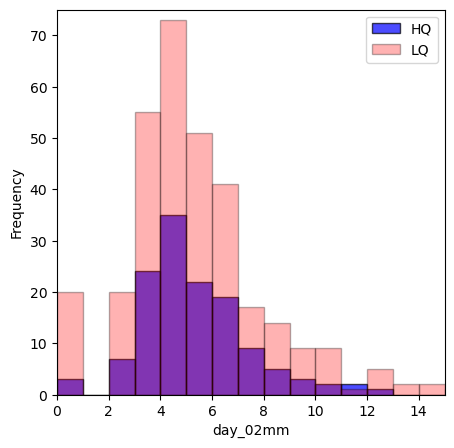

In [78]:
fig, ax = plt.subplots(figsize = (5, 5))

variable = 'day_02mm' 
df_hq = df_compare[df_compare['quality_y'] == 'HQ']
df_lq = df_compare[df_compare['quality_y'] == 'LQ']
p_availability_hq = df_hq[variable].mean()
p_availability_lq = df_lq[variable].mean()
# Determine the bin width
bin_width = 1 # Adjust as needed
# Calculate bin edges
data_min = math.floor(min(df_hq[variable].min(), df_lq[variable].min())/10)*10
data_max = max(df_hq[variable].max(), df_lq[variable].max())
bins = np.arange(data_min, data_max + bin_width, bin_width)

# Plot data on each subplot
ax.hist(df_hq[variable], bins=bins, alpha=0.7, label='HQ', color='blue', edgecolor='black')
ax.hist(df_lq[variable], bins=bins, alpha=0.3, label='LQ', color='red', edgecolor='black')
ax.set_xlim(0, 15)
ax.set_ylim(0, 75)

ax.legend()
ax.set_xlabel(variable)
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

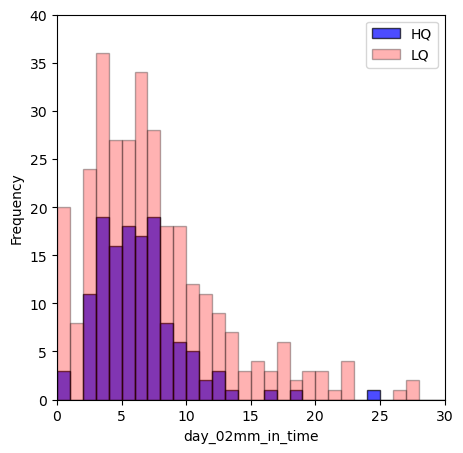

In [79]:
fig, ax = plt.subplots(figsize = (5, 5))

variable = 'day_02mm_in_time' 
df_hq = df_compare[df_compare['quality_y'] == 'HQ']
df_lq = df_compare[df_compare['quality_y'] == 'LQ']
p_availability_hq = df_hq[variable].mean()
p_availability_lq = df_lq[variable].mean()
# Determine the bin width
bin_width = 1 # Adjust as needed
# Calculate bin edges
data_min = math.floor(min(df_hq[variable].min(), df_lq[variable].min())/10)*10
data_max = max(df_hq[variable].max(), df_lq[variable].max())
bins = np.arange(data_min, data_max + bin_width, bin_width)

# Plot data on each subplot
ax.hist(df_hq[variable], bins=bins, alpha=0.7, label='HQ', color='blue', edgecolor='black')
ax.hist(df_lq[variable], bins=bins, alpha=0.3, label='LQ', color='red', edgecolor='black')
ax.set_xlim(0, 30)
ax.set_ylim(0, 40)

ax.legend()
ax.set_xlabel(variable)
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

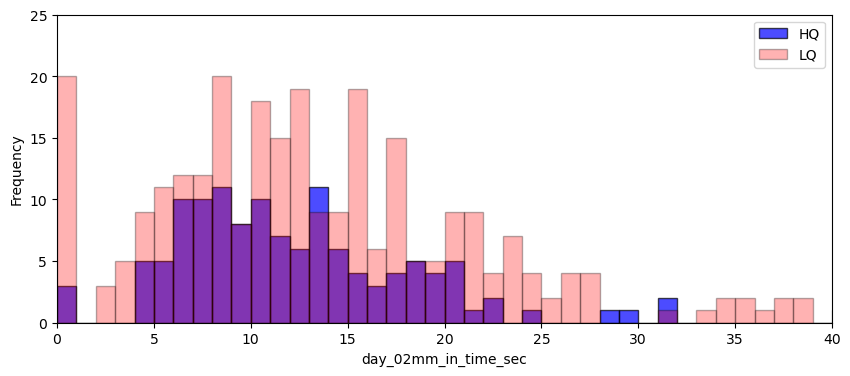

In [80]:
fig, ax = plt.subplots(figsize = (10, 4))

variable = 'day_02mm_in_time_sec' 
df_hq = df_compare[df_compare['quality_y'] == 'HQ']
df_lq = df_compare[df_compare['quality_y'] == 'LQ']
p_availability_hq = df_hq[variable].mean()
p_availability_lq = df_lq[variable].mean()
# Determine the bin width
bin_width = 1 # Adjust as needed
# Calculate bin edges
data_min = math.floor(min(df_hq[variable].min(), df_lq[variable].min())/10)*10
data_max = max(df_hq[variable].max(), df_lq[variable].max())
bins = np.arange(data_min, data_max + bin_width, bin_width)

# Plot data on each subplot
ax.hist(df_hq[variable], bins=bins, alpha=0.7, label='HQ', color='blue', edgecolor='black')
ax.hist(df_lq[variable], bins=bins, alpha=0.3, label='LQ', color='red', edgecolor='black')
ax.set_xlim(0, 40)
ax.set_ylim(0, 25)

ax.legend()
ax.set_xlabel(variable)
ax.set_ylabel('Frequency')